In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
saltd = np.load("saldepthallnew.npy")
tempd = np.load("temdepfnew2.npy")
aged = np.load("agedepthallnew.npy")

dens = np.loadtxt("dens.out")
den250 = np.loadtxt("den250.out")

salt = np.loadtxt("sal1.out")

In [3]:
#wspxx.shape

In [4]:
wspxx = np.loadtxt("wspxx2new.out")
mrpxx = np.loadtxt("mrpxx2.out")
#noxx = np.loadtxt("noxx.out")
t = np.arange(2,348,1)

In [5]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100
B = C

In [6]:
A = np.arange(350)
#B = np.arange(50)
xx, yy = np.meshgrid(B, A)

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'interpolation'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: The following kwargs were not used by contour: 'interpolation'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: The following kwargs were not used by contour: 'interpolation'
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


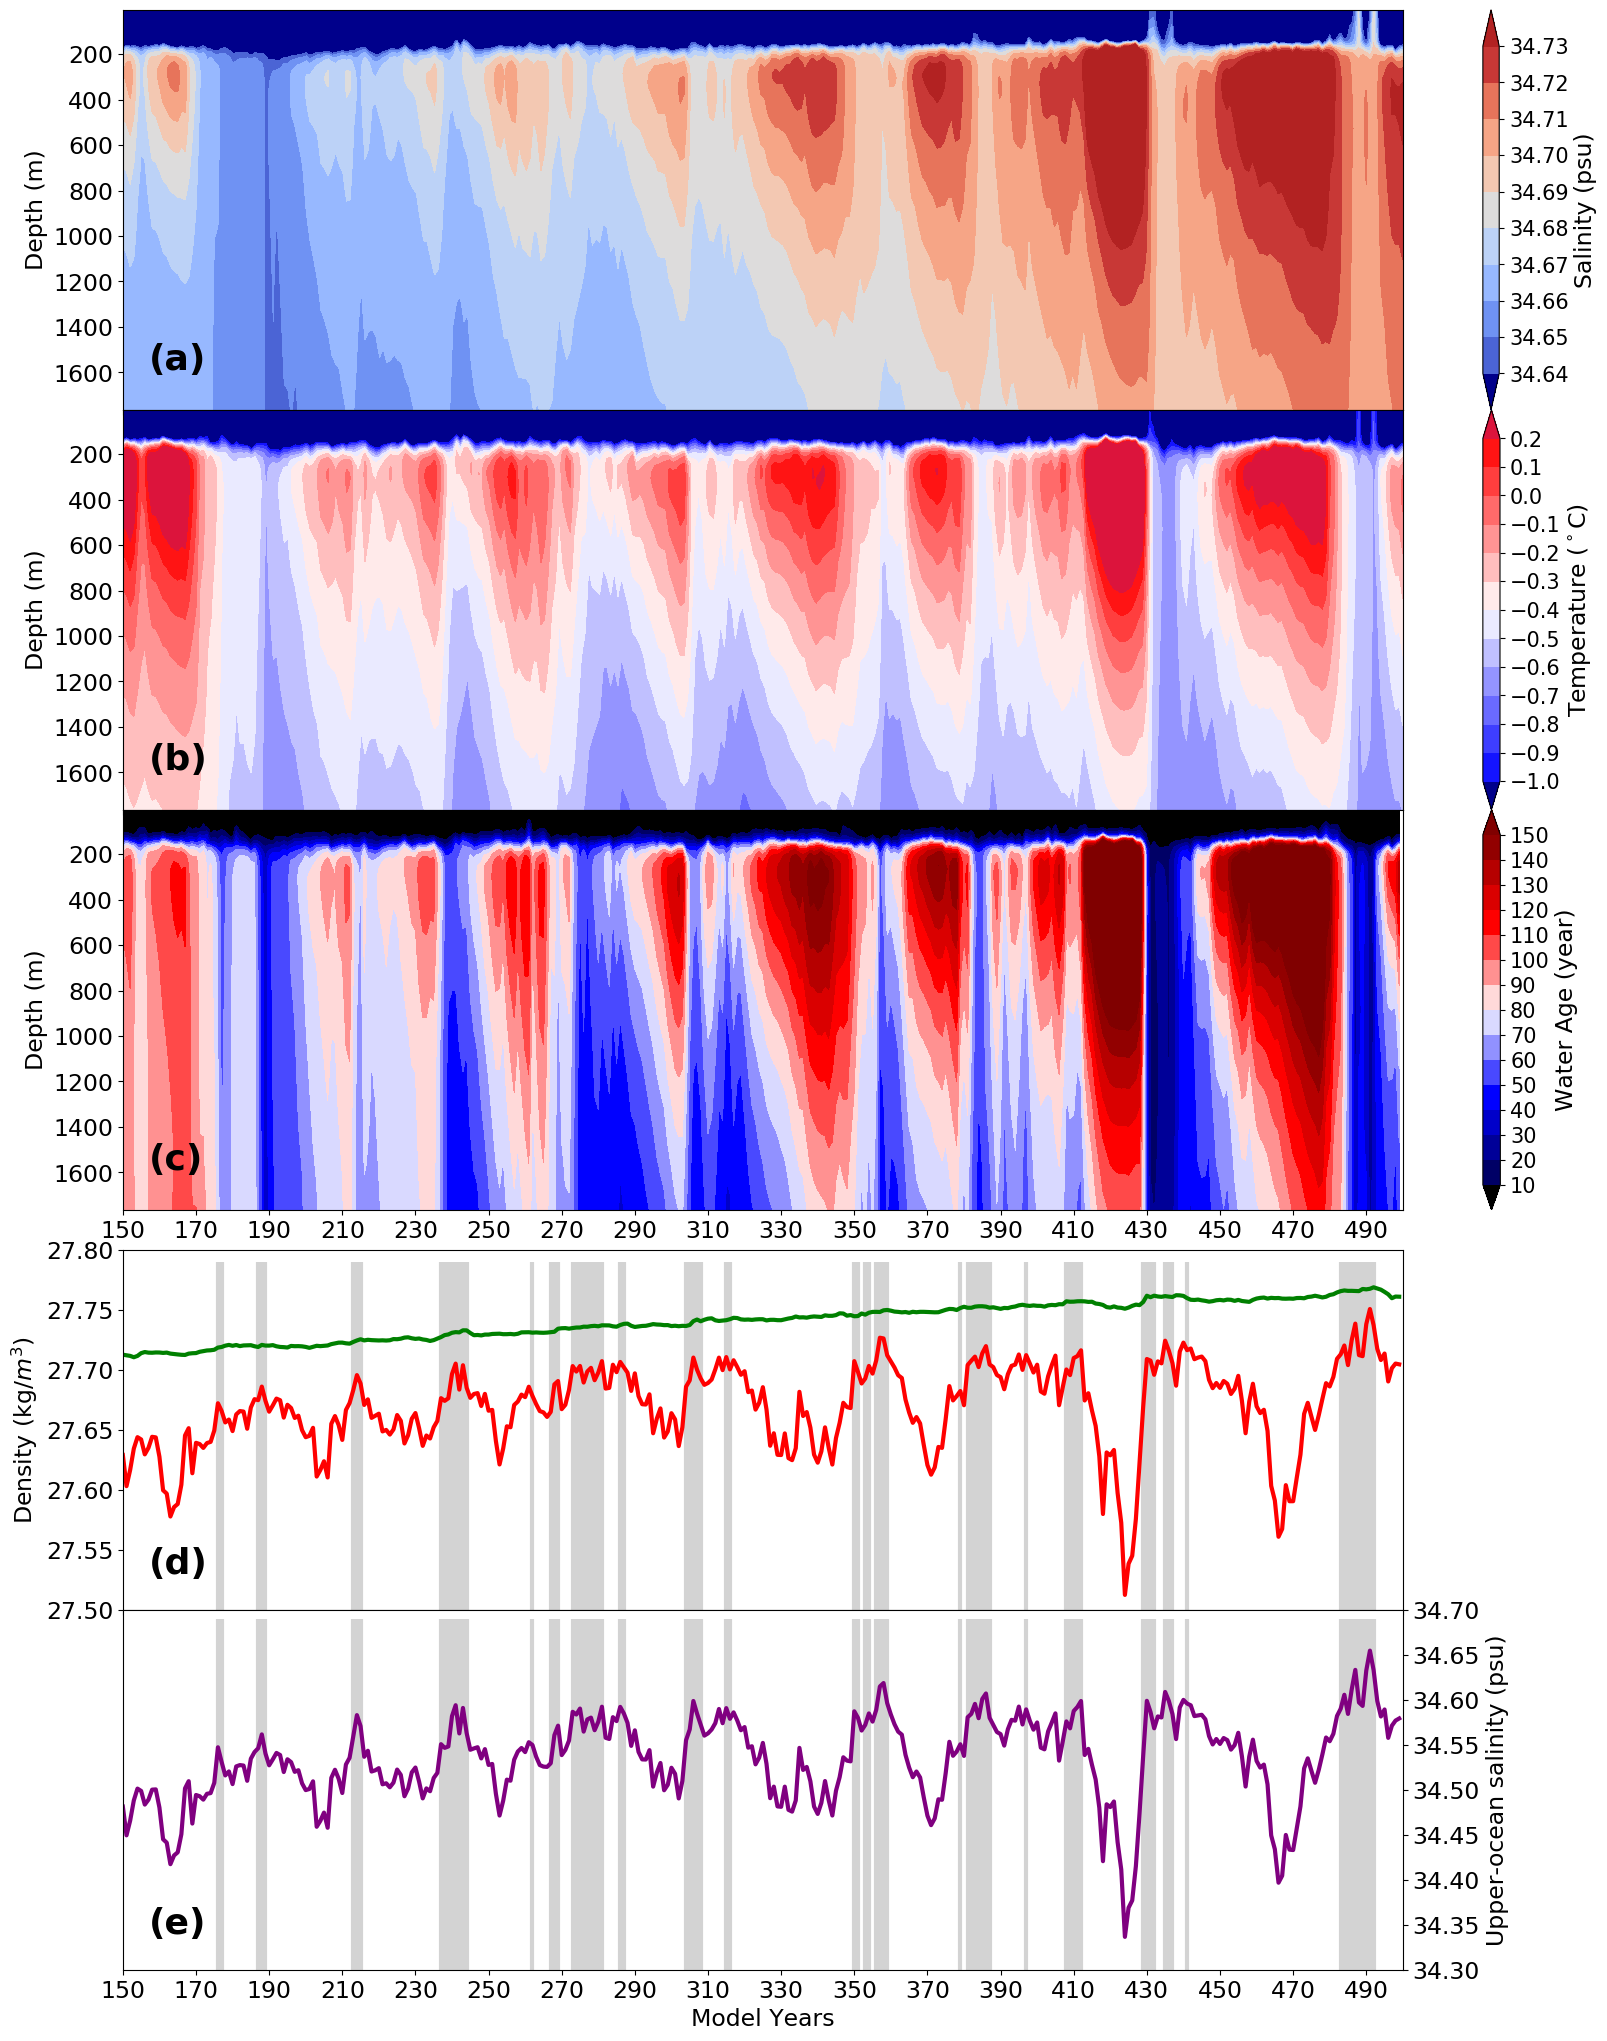

In [7]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(0,350,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[])
nice_cmap=plt.get_cmap('coolwarm')
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"coolwarm")
my_font = {'fontname':'Cambria', 'size':'17'}
nice_levels = [34.64,34.65,34.66,34.67,34.68,34.69,34.7,34.71,34.72,34.73]

#plt.text(-30, 300, '(a)', fontsize=25)
#plt.title('(a)', fontsize=25)
im = ax1.contourf(yy[:,:45], xx[:,:45], saltd[:,:45],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
###############################colorbarsetting
cbar = fig.colorbar(im, ax=ax1, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('Salinity (psu)', **my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
plt.yticks(**my_font)
ax1.text(0.02, 0.1, '(a)', transform=ax1.transAxes,size=26, weight='bold')
#############################
###########################################
ax2 = fig.add_axes([0.1, 0.7, 0.8, 0.2],
                   xticklabels=[])
#nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
nice_cmap=plt.get_cmap('bwr')
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
#new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
new_cmap = cols.ListedColormap(lev_cmap,"bwr")
my_font = {'fontname':'Cambria', 'size':'17'}
nice_levels = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2]
#plt.title('(b)', fontsize=25)
im = ax2.contourf(yy[:,:45], xx[:,:45], tempd[:,:45],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('crimson')
im.cmap.set_under('darkblue')
cbar = fig.colorbar(im, ax=ax2, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Temperature ($^\circ$C)', **my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
plt.yticks(**my_font)
ax2.text(0.02, 0.1, '(b)', transform=ax2.transAxes,size=26, weight='bold')
#####################################################################
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.2],
                   xlim=(0, 350))

nice_cmap=plt.get_cmap('seismic')
lev_cmap = nice_cmap([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,\
                      200,210,220,230,240])
new_cmap = cols.ListedColormap(lev_cmap,"seismic")
my_font = {'fontname':'Cambria', 'size':'17'}
#nice_levels = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
nice_levels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
#plt.text(-30, 300, '(c)', fontsize=25)
im = ax3.contourf(yy[:,:45], xx[:,:45], aged[:,:45],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('maroon')
im.cmap.set_under('black')
cbar = fig.colorbar(im, ax=ax3, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Water Age (year)', **my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
plt.yticks(**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)
#plt.title('(c)', fontsize=25)
ax3.text(0.02, 0.1, '(c)', transform=ax3.transAxes,size=26, weight='bold')
###########################################
ax4 = fig.add_axes([0.1, 0.3, 0.8, 0.18],
                   xticklabels=[],ylim=(27.5, 27.8))
ax4.plot(t,dens,'r',linewidth=3)
ax4.plot(t,den250,'g',linewidth=3)


plt.ylabel('Density (kg/$m^3$)',color= 'k',**my_font)
plt.vlines(wspxx, 27.5, 27.79, colors = "lightgrey",linewidth=3)
#ax4.text(-30, 300, '(d)', fontsize=25)
ax4.set(ylim=(27.5, 27.8),xlim=(0, 350))
plt.yticks(**my_font)
cbar = fig.colorbar(im,ax=ax4) 
cbar.remove()
#plt.title('(d)', fontsize=25)
ax4.text(0.02, 0.1, '(d)', transform=ax4.transAxes,size=26, weight='bold')
##########################################################################################
ax5 = fig.add_axes([0.1, 0.12, 0.8, 0.18],
                   xlim=(0, 350),ylim=(34.30,34.70))
ax5.plot(t,salt,'purple',linewidth=3)
plt.vlines(wspxx, 34.3, 34.69, colors = "lightgrey",linewidth=3)
plt.xlabel('Model Years',**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)
cbar = fig.colorbar(im,ax=ax5) 
cbar.remove()
plt.ylabel('Upper-ocean salinity (psu)',**my_font)

#plt.text(-30, 300, '(e)', fontsize=25)

ax5.yaxis.set_label_position('right')
ax5.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
#plt.title('(e)', fontsize=25)
ax5.text(0.02, 0.1, '(e)', transform=ax5.transAxes,size=26, weight='bold')
plt.savefig("reserv.png",bbox_inches='tight',dpi=fig.dpi)

